##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [14]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [15]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 11s 4ms/step - loss: 0.5215 - accuracy: 0.8249
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3383 - accuracy: 0.8766
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2983 - accuracy: 0.8905
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2792 - accuracy: 0.8978
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2587 - accuracy: 0.9039
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2434 - accuracy: 0.9093
Epoch 7/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2325 - accuracy: 0.9136
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2168 - accuracy: 0.9193
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2075 - accuracy: 0.9223
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.19

In [38]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [36]:
y_prob = model.predict(x_test)
print(y_prob[0])
print(y_prob[0].sum())

313/313 [==============================] - 1s 2ms/step
[4.0133983e-20 1.4495755e-27 7.3558757e-21 1.3609642e-22 9.1978406e-20
 3.7766325e-11 1.6474479e-19 3.7964618e-09 3.2317397e-20 1.0000000e+00]
1.0


Data of one image

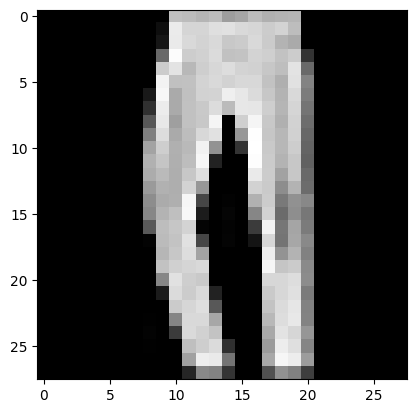

In [30]:
plt.imshow(x_test[5,:,:,0], cmap="gray")

In [41]:
import numpy as np
print(np.argmax(y_prob[5]))
print(y_test[5])

1
1


In [40]:
y_hat = np.argmax(y_prob, axis=1)
correct = (y_hat == y_test).sum()
print("Correct classes: {} of {} (accuracy: {})".format(correct, 10000, correct/10000))

Correct classes: 8907 of 10000 (accuracy: 0.8907)


In [ ]:
# END